# Bagging

### Standalone decision trees vs. Bagging

In [61]:
#Bagged Decision Trees for Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn import preprocessing
 

In [9]:
# read the data in
df = pd.read_csv("./Diabetes.csv")
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
''' is any missing values across columns'''
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
''' count of missing values of the entire dataframe'''
df.isnull().sum().sum()

0

In [13]:
# get the locations
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [16]:
#Normalize
X = StandardScaler().fit_transform(X)

In [25]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)
kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
num_trees = 10

In [32]:
# Decision Tree with 5 fold cross validation
clf_DT = DecisionTreeClassifier(random_state=2019).fit(X_train,y_train)
results = cross_val_score(clf_DT, X_train,y_train, cv=kfold)
print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_DT.predict(X_test), y_test))


Decision Tree (stand alone) - Train :  0.6678395308543249
Decision Tree (stand alone) - Test :  0.6623376623376623


In [35]:
# Using Bagging Lets build 100 decision tree models and average/majority vote prediction
clf_DT_Bag = BaggingClassifier(base_estimator=clf_DT, n_estimators=num_trees, random_state=2019).fit(X_train,y_train)
results = cross_val_score(clf_DT_Bag, X_train, y_train, cv=kfold)
print ("\nDecision Tree (Bagging) - Train : ", results.mean())
print ("Decision Tree (Bagging) - Test : ", metrics.accuracy_score(clf_DT_Bag.predict(X_test), y_test))


Decision Tree (Bagging) - Train :  0.7378648540583767
Decision Tree (Bagging) - Test :  0.7662337662337663


### Decision Tree feature importance function

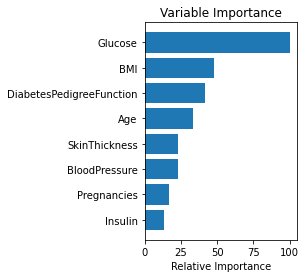

In [40]:
feature_importance = clf_DT.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.
max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = cross_val_score(clf_RF, X_train, y_train, cv=kfold)
print ("\nRandom Forest (Bagging) - Train : ", results.mean())
print ("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))


Random Forest (Bagging) - Train :  0.7395441823270692
Random Forest (Bagging) - Test :  0.7987012987012987


### Standalone decision tree vs. Adaboost

In [47]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Let's use some weak features to build the tree
X = df[['Age','Insulin']] # independent variables
y = df['Outcome'].values # dependent variables


In [48]:
#Normalize
X = StandardScaler().fit_transform(X)

In [50]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)
kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
num_trees = 100


In [54]:
# Decision Tree with 5 fold cross validation
# lets restrict max_depth to 1 to have more impure leaves
clf_DT = DecisionTreeClassifier(max_depth=1, random_state=2019).fit(X_train,y_train)
results = cross_val_score(clf_DT, X_train,y_train, cv=kfold.split(X_train, y_train))
print("Decision Tree (stand alone) - CV Train : %.2f" % results.mean())
print("Decision Tree (stand alone) - Test : %.2f" % metrics.accuracy_score(clf_DT.predict(X_train), y_train))
print("Decision Tree (stand alone) - Test : %.2f" % metrics.accuracy_score(clf_DT.predict(X_test), y_test))

Decision Tree (stand alone) - CV Train : 0.64
Decision Tree (stand alone) - Test : 0.64
Decision Tree (stand alone) - Test : 0.70


In [55]:
#Using Adaptive Boosting of 100 iteration
clf_DT_Boost = AdaBoostClassifier(base_estimator=clf_DT, n_estimators=num_trees, learning_rate=0.1, random_state=2019).fit(X_train,y_train)
results = cross_val_score(clf_DT_Boost, X_train, y_train, cv=kfold.split(X_train, y_train))
print("\nDecision Tree (AdaBoosting) - CV Train : %.2f" % results.mean())
print("Decision Tree (AdaBoosting) - Train : %.2f" % metrics.accuracy_score(clf_DT_Boost.predict(X_train), y_train))
print("Decision Tree (AdaBoosting) - Test : %.2f" % metrics.accuracy_score(clf_DT_Boost.predict(X_test), y_test))


Decision Tree (AdaBoosting) - CV Train : 0.68
Decision Tree (AdaBoosting) - Train : 0.71
Decision Tree (AdaBoosting) - Test : 0.79


# Boosting

### Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
# Using Gradient Boosting of 100 iterations
clf_GBT = GradientBoostingClassifier(n_estimators=num_trees, learning_rate=0.1, random_state=2019).fit(X_train, y_train)
results = cross_val_score(clf_GBT, X_train, y_train, cv=kfold)

### xgboost Classifier Using sklearn Wrapper

In [59]:
!pip install xgboost

In [60]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

predictors = ['Age','Insulin']
target = 'Outcome'



In [63]:
from sklearn import preprocessing
for f in df.columns:
    if df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))
df.fillna((-999), inplace=True)


In [65]:
# Let's use some week features to build the tree
X = df[['Age','Insulin']] # independent variables
y = df['Outcome'].values # dependent variables

In [66]:
#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)
num_rounds = 100

In [70]:
kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
clf_XGB = XGBClassifier(n_estimators = num_rounds,objective= 'binary:logistic',seed=2017)

In [71]:
# use early_stopping_rounds to stop the cv when there is no score imporovement
clf_XGB.fit(X_train,y_train, early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=False)
results = cross_val_score(clf_XGB, X_train,y_train, cv=kfold)
print ("\nxgBoost - CV Train : %.2f" % results.mean())
print ("xgBoost - Train : %.2f" % metrics.accuracy_score(clf_XGB.predict (X_train), y_train))
print ("xgBoost - Test : %.2f" % metrics.accuracy_score(clf_XGB.predict (X_test), y_test))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[22:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#  Ensemble Voting

In [75]:
import pandas as pd
import numpy as np

# set seed for reproducability
np.random.seed(2017)
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
!pip install mlxtend

In [82]:
# currently its available as part of mlxtend and not sklearn
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
import mlxtend
# read the data in
#df = pd.read_csv("Data/Diabetes.csv")
X = df.iloc[:,:8] # independent variables
y = df['Outcome'] # dependent variables
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2017)

In [83]:
LR = LogisticRegression(random_state=2017)
RF = RandomForestClassifier(n_estimators = 100, random_state=2017)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, SVM, KNC, DTC, ABC, BC, GBC],
                      ['Logistic Regression',
                       'Random Forest',
                       'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting']):
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy') 
    print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
md = clf.fit(X, y)
clfs.append(md)
print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict (X_test), y_test)))


5-fold cross validation:

Train CV Accuracy: 0.76 (+/- 0.04) [Logistic Regression]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Train CV Accuracy: 0.74 (+/- 0.03) [Random Forest]
Train CV Accuracy: 0.74 (+/- 0.04) [Support Vector Machine]
Train CV Accuracy: 0.70 (+/- 0.05) [KNeighbors]
Train CV Accuracy: 0.69 (+/- 0.02) [Decision Tree]
Train CV Accuracy: 0.73 (+/- 0.04) [Ada Boost]
Train CV Accuracy: 0.73 (+/- 0.03) [Bagging]
Train CV Accuracy: 0.75 (+/- 0.04) [Gradient Boosting]
Test Accuracy: 0.92 


In [85]:
# ### Ensemble Voting
clfs = []
print('5-fold cross validation:\n')
ECH = EnsembleVoteClassifier(clfs=[LR, RF, GBC], voting='hard')
ECS = EnsembleVoteClassifier(clfs=[LR, RF, GBC], voting='soft', weights=[1,1,1])
for clf, label in zip([ECH, ECS],
                      ['Ensemble Hard Voting',
                       'Ensemble Soft Voting']):
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
md = clf.fit(X, y)
clfs.append(md)
print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict (X_test), y_test)))

5-fold cross validation:



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Train CV Accuracy: 0.76 (+/- 0.02) [Ensemble Soft Voting]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.94 


#### Extract from Mastering Machine Learning with  Python in Six Steps
